# Data Preprocessing

### Import Packages and CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option("display.max_columns",None)

# import Dataset
df = pd.read_csv("Visadataset.csv")

In [4]:
df.shape

(25480, 12)

## Data Cleaning:

#### Handling Missing values:

* Check the Null Values
* Checking Duplicates
* Check data type
* Understand the dataset


#### Check Null Values

In [6]:
features_with_na = [var for var in df.columns if df[var].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100),"% of missing values")

#### Checking Duplicates

In [7]:
df.duplicated().sum()

0

#### Remove `case_id`  which has all unique values from the dataset.

In [11]:
df.drop('case_id',axis=1,inplace=True)

## Feature Engineering

#### Feature Extraction

In [12]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [18]:
# importing Date class from datetime module:
from datetime import date

# Creating the date object of today's date
todays_date = date.today()
current_year=todays_date.year
current_year

2024

In [19]:
# Substract the current year with the year_of_estb to get the age of the company

df['company_age'] = current_year - df['yr_of_estab']

In [21]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [22]:
df.drop('yr_of_estab',axis=1,inplace=True)

### Type of features

### Numerical Features

In [23]:
num_features = [col for col in df.columns if df[col].dtype !="O"]
print(f"Numbers of Numerical features: {len(num_features)}")

Numbers of Numerical features: 3


### Categorical Features

In [25]:
cat_features = [col for col in df.columns if df[col].dtype =="O"]
print(f"Numbers of Categorical features: {len(cat_features)}")

Numbers of Categorical features: 8


### Discrete Features

In [29]:
discrete_features = [col for col in num_features if df[col].nunique()<=25]
print(f"Numbers of discrete features: {len(discrete_features)}")

Numbers of discrete features: 0


### Continous Features

In [30]:
continous_features = [col for col in num_features if col not in discrete_features]
print(f"Numbers of continous features: {len(continous_features)}")

Numbers of continous features: 3


### Split data to `'X'` for Independent Variable and `'y'` for Dependent Variable

In [31]:
X = df.drop('case_status',axis=1)
y = df['case_status']

In [32]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

#### Manual encoding target column

In [33]:
y = np.where(y=='Denied',1,0)

In [35]:
y

array([1, 0, 1, ..., 0, 0, 0])

### Feature Transformation

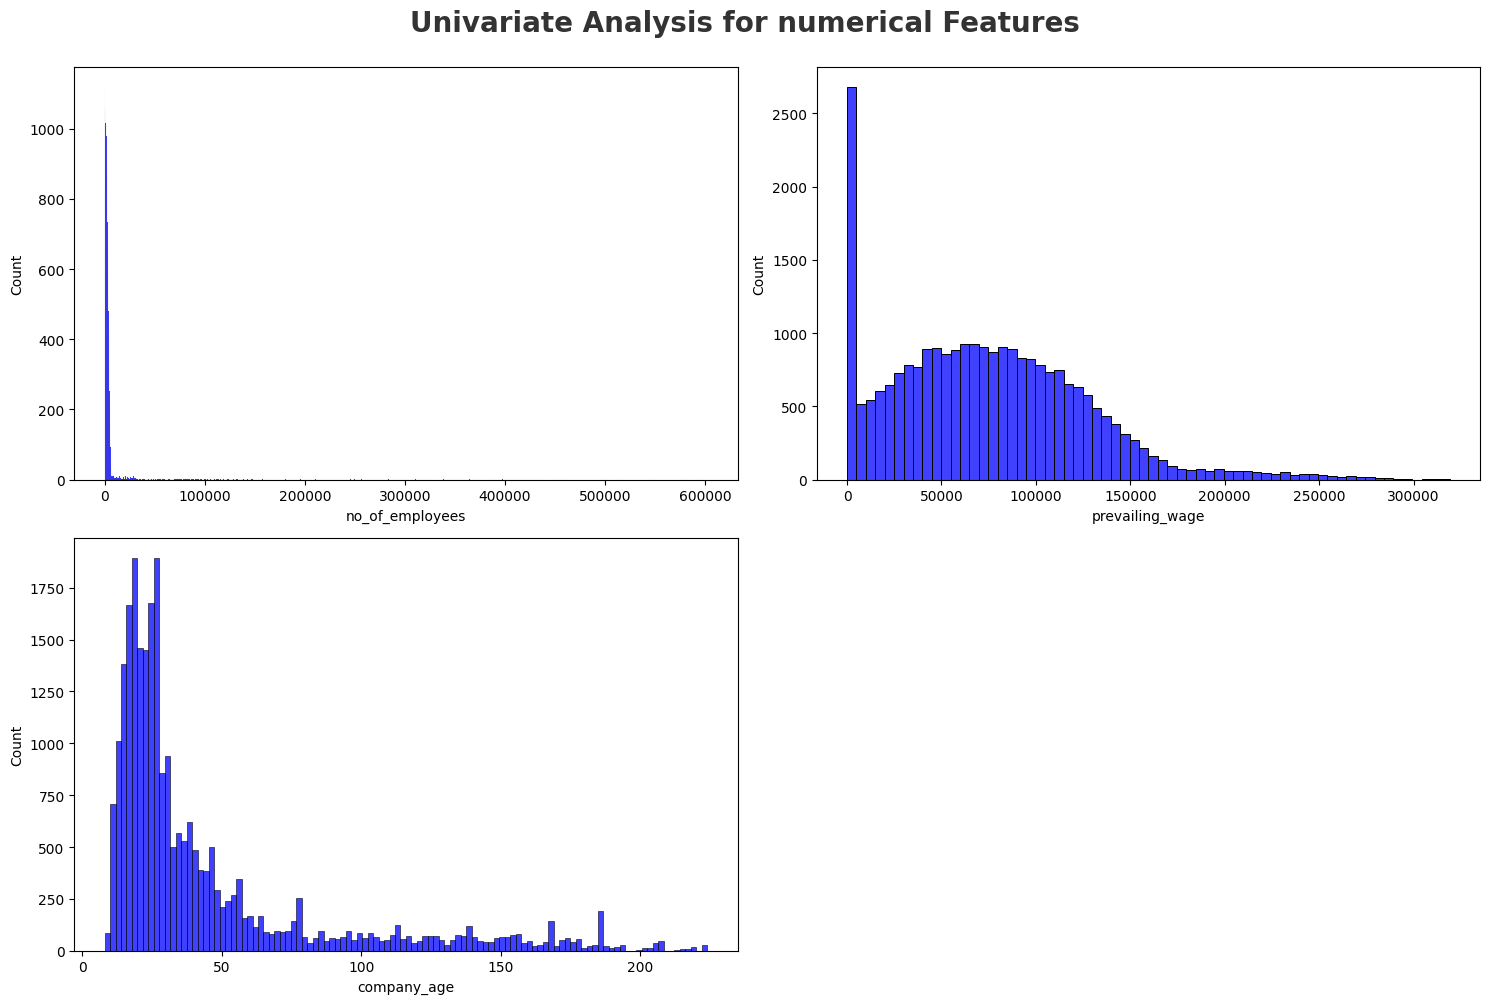

In [40]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis for numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(num_features)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[num_features[i]],color='blue')
    plt.xlabel(num_features[i])
    plt.tight_layout()


In [42]:
X[continous_features].skew(skipna=True, axis=0)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

### Skewness and Transformers:

#### What is skewness?
Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A Normal distribution has a skewness of zero. 

#### What are Transformers?
Power transformers are a family of parametric, monotonic transformations applied to skewed data to make it more Gaussian-like. This is useful for tackling modelling issues related to heteroscedasticity or other situations requiring normalisation.

Currently, transformation supports the Box-cox transformation and Yeo-Johnson transformation.

In [44]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
powertransform_features = ["no_of_employees","company_age"]
X_copy = pt.fit_transform(X[powertransform_features])

In [46]:
X_copy = pd.DataFrame(X_copy,columns=powertransform_features)
X_copy

,no_of_employees,company_age
0,1.517300,-0.952162
1,0.030912,-0.462942
2,2.885076,-1.075820
3,-1.343550,1.629178
4,-0.432287,-0.733953
...,...,...
25475,0.079917,-1.075820
25476,0.235747,-0.838640
25477,-0.413885,1.547445
25478,-0.111949,1.683834


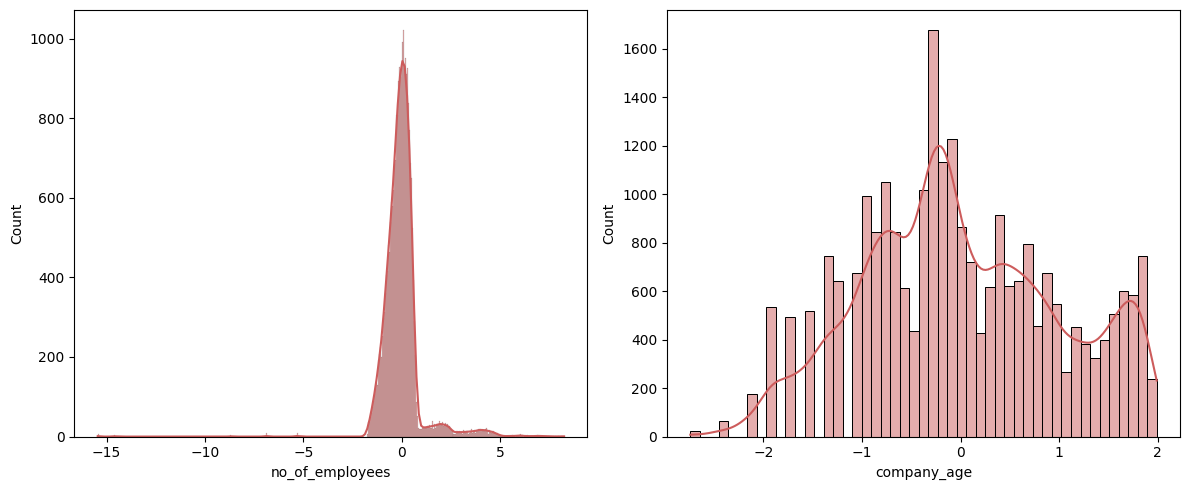

In [49]:
plt.figure(figsize=(12,5))
for i,col in enumerate(powertransform_features):
    plt.subplot(1,2,i+1)
    sns.histplot(data=X_copy,x=col,color='indianred',kde=True)
    plt.xlabel(col)
    plt.tight_layout()

In [50]:
X_copy.skew()

no_of_employees    0.399339
company_age        0.103264
dtype: float64

## Feature Encoding and Scaling

#### One Hot encoding for columns which has lesser unique values and also not oridinal.

* One hot encoding is the process by which categorical variables are converted into a form that could be provided to ML algorithm to do a better job in prediction.

#### Ordinal encoding for columns which has many unique categories

* Oridinal encoding is used here as label encoder is supported for column transformer.
* Oridinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

#### Standard Scaler

* Standardize features by removing the mean and scaling to unit variance

In [62]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [64]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

## Preprocessing using Column Transformer

In [68]:
# Create Column transformer with 3 types of transformers:
or_columns = ["has_job_experience","requires_job_training","full_time_position","education_of_employee"]
oh_columns = ["continent","unit_of_wage","region_of_employment"]


In [70]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()
power_transformer = PowerTransformer()

preprocessor = ColumnTransformer(
    [
        ('OneHotencoder',ohe_transformer,oh_columns),
        ('OrdinalEncoder',ordinal_transformer,or_columns),
        ('power_transformer',power_transformer,powertransform_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [72]:

X = preprocessor.fit_transform(X)

In [73]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

## Handle Imbalanced Problem for classification problem

In [76]:
from imblearn.combine import SMOTETomek,SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(sampling_strategy='minority',random_state=42)

# Fit the model and generate the data.
X_res, y_res = smt.fit_resample(X,y)

## Train Test Split

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

X_train.shape,X_test.shape

((13638, 24), (3410, 24))

# Model Training

In [99]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,f1_score

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [100]:
def evaluate_classifier(true,predicted):
    acc = accuracy_score(true,predicted) # Calculate Accuracy
    f1 = f1_score(true,predicted) # Calculate f1
    precision = precision_score(true,predicted) # Calculate precision
    recall = recall_score(true,predicted) # Calculate recall
    roc_auc = roc_auc_score(true,predicted) # Calculate roc_auc
    return acc,f1,precision,recall,roc_auc

In [101]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "K-Nearest Neighbour" : KNeighborsClassifier(),
    "XGBClassifier" : XGBClassifier(),
    "Cat Boosting Classifier" : CatBoostClassifier(verbose=False),
    "Support Vector Classifier" : SVC(),
    "AdaBoost Classifier" : AdaBoostClassifier(),
    "Naive Bayes Classifier" : GaussianNB()
}

In [105]:
def evaluate_models(X,y,models):
    
    '''
    This function takes in X and y and models in dictionary format as input.
    It splits the data into Train Test split.
    Iterates through the given model dictionary and evaluates the matrics.
    Returns: DataFrame which contains report of all the models metrics with cost
    '''
    # Seperate the dataset into train and test.
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    models_list = []
    accuracy_list = []
    auc = []

    # Training model
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train) # Training model

        # Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    
        # Training set performance
        model_train_accuracy , model_train_f1 , model_train_precision , model_train_recall , model_train_roc_auc_score= evaluate_classifier(y_train, y_train_pred)
        
        # Testing set performance
        model_test_accuracy , model_test_f1 , model_test_precision , model_test_recall , model_test_roc_auc_score= evaluate_classifier(y_test, y_test_pred)
    
        print(list(models.keys())[i])
        models_list.append((list(models.keys())[i]))
    
        print("Model performance for training set")
        print(f"- Accuracy: {model_train_accuracy:.4f}")    
        print(f"- f1 score: {model_train_f1:.4f}")    
        print(f"- Precision: {model_train_precision:.4f}")    
        print(f"- Recall: {model_train_recall:.4f}")    
        print(f"- roc auc score: {model_train_roc_auc_score:.4f}")    
    
        print("-------------------------------------")
    
        print("Model performance for testing set")
        print(f"- Accuracy: {model_test_accuracy:.4f}") 
        accuracy_list.append(model_test_accuracy)
        print(f"- f1 score: {model_test_f1:.4f}")    
        print(f"- Precision: {model_test_precision:.4f}")    
        print(f"- Recall: {model_test_recall:.4f}")    
        print(f"- roc auc score: {model_test_roc_auc_score:.4f}")
        auc.append(model_test_roc_auc_score)
        print('='*35)
        print('\n')
    
    report=pd.DataFrame(list(zip(models_list,accuracy_list)),columns=["Model Name","Accuracy"]).sort_values(by=['Accuracy'],ascending=False)
    return report



In [106]:
base_model_report = evaluate_models(X=X_res, y=y_res,models=models)

Random Forest
Model performance for training set
- Accuracy: 1.0000
- f1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
-------------------------------------
Model performance for testing set
- Accuracy: 0.9554
- f1 score: 0.9590
- Precision: 0.9569
- Recall: 0.9611
- roc auc score: 0.9549


Decision Tree
Model performance for training set
- Accuracy: 1.0000
- f1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
-------------------------------------
Model performance for testing set
- Accuracy: 0.9258
- f1 score: 0.9318
- Precision: 0.9286
- Recall: 0.9351
- roc auc score: 0.9249


Gradient Boosting
Model performance for training set
- Accuracy: 0.8822
- f1 score: 0.8903
- Precision: 0.8945
- Recall: 0.8862
- roc auc score: 0.8819
-------------------------------------
Model performance for testing set
- Accuracy: 0.8956
- f1 score: 0.9031
- Precision: 0.9095
- Recall: 0.8967
- roc auc score: 0.8955


Logistic Regression
Model perform

In [107]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.955425
4,K-Nearest Neighbour,0.940176
5,XGBClassifier,0.935191
6,Cat Boosting Classifier,0.929619
1,Decision Tree,0.925806
2,Gradient Boosting,0.895601
7,Support Vector Classifier,0.870088
8,AdaBoost Classifier,0.868328
3,Logistic Regression,0.744868
9,Naive Bayes Classifier,0.644282


### Here we can use few best models and perform Hyper Parameter tuning

In [108]:
# Initialize few parameter for Hyperparameter tuning
# XGBoost parameters
xgboost_params = {
    'max_dept': range(3,10,2),
    'min_child_weight': range(1,6,2)
}

# Random Forest Parameters
rf_params = {
    "max_depth": [10,12,None,15,20],
    "max_features": ['sqrt','log2',None],
    "n_estimators":[10,50,100,200]
}

# KNN paramenters
knn_params = {
    "algorithm":["auto","ball_tree","kd_tree","brute"],
    "weights": ['uniform','distance'],
    "n_neighbors": [3,4,5,7,9]
}


In [110]:
# Models list for Hyperparameter tuning
randomcv_model = [
    ('XGBoost',XGBClassifier(),xgboost_params),
    ('RForest',RandomForestClassifier(),rf_params),
    ('KNN',KNeighborsClassifier(),knn_params),
]

### Create a function for model training and report which can be used in hyperparameter tuning loop

In [111]:
from sklearn.model_selection import RandomizedSearchCV

model_param  = {}

for name,model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2, n_jobs=-1)
    random.fit(X_res,y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------------ BEST PARAMS FOR {model_name} ------------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
------------------ BEST PARAMS FOR XGBoost ------------------------------
{'min_child_weight': 1, 'max_dept': 3}
------------------ BEST PARAMS FOR RForest ------------------------------
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
------------------ BEST PARAMS FOR KNN ------------------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [112]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_dept': 3},
 'RForest': {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

## Retraining the model with best parameters

In [116]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models={
    "Random Forest Classifier": RandomForestClassifier(**model_param["RForest"]),
    "KNeighbors Classifier": KNeighborsClassifier(**model_param["KNN"]),
    "XGB Classifier": XGBClassifier(**model_param["XGBoost"],n_jobs=-1)
}

tuned_report = evaluate_models(X_res,y_res,models=best_models)

Random Forest Classifier
Model performance for training set
- Accuracy: 1.0000
- f1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
-------------------------------------
Model performance for testing set
- Accuracy: 0.9575
- f1 score: 0.9609
- Precision: 0.9586
- Recall: 0.9632
- roc auc score: 0.9569


KNeighbors Classifier
Model performance for training set
- Accuracy: 1.0000
- f1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
-------------------------------------
Model performance for testing set
- Accuracy: 0.9733
- f1 score: 0.9757
- Precision: 0.9651
- Recall: 0.9865
- roc auc score: 0.9721


XGB Classifier
Model performance for training set
- Accuracy: 0.9809
- f1 score: 0.9823
- Precision: 0.9825
- Recall: 0.9821
- roc auc score: 0.9808
-------------------------------------
Model performance for testing set
- Accuracy: 0.9352
- f1 score: 0.9400
- Precision: 0.9443
- Recall: 0.9356
- roc auc score: 0.9351




In [117]:
tuned_report

,Model Name,Accuracy
1,KNeighbors Classifier,0.973314
0,Random Forest Classifier,0.957478
2,XGB Classifier,0.935191


In [119]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
clf_report = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print(f"Accuracy score Value: {score:.4f}")
print(clf_report)

FINAL MODEL 'KNN'
Accuracy score Value: 0.9733
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



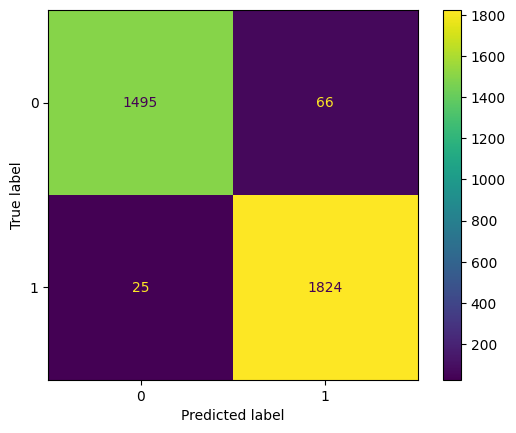

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)